### Acknowledgement
Name: Zuha Aqib     
ERP ID: 26106    
Section: 10am Miss Solat     
Date: (written on) 08-Mar-25    

code has been taken from Miss Solat's code files and written by Zuha themselves. 

In [326]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-03-09 15:22:10


In [327]:
erp = 26106 
# will be referenced later on in the code when we use it for random_state
erp

26106

# Imports
here we import all the necessary libraries and modules

In [328]:
# to load the dataset
import warnings
warnings.filterwarnings('ignore')

# to handle the data and perform numerical operations on it
import pandas as pd
import numpy as np

# to do natural language processing
import nltk

# preprocessing: to clean the data
import re

# preprocessing: stop words removal
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# preprocessing: words tokenization
from nltk.tokenize import word_tokenize

# preprocessing: stemmming and lemmatization
from nltk.stem import WordNetLemmatizer

# model running
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# clustering: k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to plot the graph
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# Time Displayer
this code is a function that we will call at multiple instances of the code to see how long it took to run the code to see when it ran

In [329]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Load the Dataset
Here we load the dataset from a csv file and then save it into a variable

In [330]:
dummy_dataframe = pd.read_csv("dataset/news_Feb_14.csv")
dummy_dataframe = dummy_dataframe.iloc[:, 0]  # Select only the headline column
documents = dummy_dataframe.tolist()  # Convert to list
documents

['ECC endorses purchase of $582mn capital shares in BRICS’s New Development Bank',
 'Netanyahu’s statement to establish Palestinian state in Saudi Arabia irresponsible, provocative: FO',
 'India, US agree to resolve trade and tariff rows after Trump-Modi talks',
 'Aurangzeb discusses Pakistan’s structural reforms with IFC chief',
 'HBL, S&P Global launch Pakistan’s first manufacturing PMI',
 'KSE-100 closes 479 points lower as late-session selling erases intra-day gains',
 'PPL executes agreements for Sui Gas Field operations',
 'Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan',
 'Rupee records marginal improvement against US dollar',
 'At least 9 dead, 7 injured in Balochistan’s Harnai blast',
 'Gold adds to record rally, reaches Rs306,200 per tola in Pakistan',
 'IMF’s 2024 Article IV report, and debate on inflation—I',
 'Pakistan CPI 2024 – deep-rooted corruption persists',
 '‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network',
 'Reforming 

In [331]:
original_headlines = documents.copy()

# Preprocessing
here we perform the preprocessing of data like:
- lowercase text
- stopword removal
- stemming or lemmatization
- n-grams

## Lowercase Conversion
here we convert our text to lowercase

In [332]:
documents = [document.lower() for document in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-03-09 15:22:10


['ecc endorses purchase of $582mn capital shares in brics’s new development bank',
 'netanyahu’s statement to establish palestinian state in saudi arabia irresponsible, provocative: fo',
 'india, us agree to resolve trade and tariff rows after trump-modi talks',
 'aurangzeb discusses pakistan’s structural reforms with ifc chief',
 'hbl, s&p global launch pakistan’s first manufacturing pmi',
 'kse-100 closes 479 points lower as late-session selling erases intra-day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistan’s harnai blast',
 'gold adds to record rally, reaches rs306,200 per tola in pakistan',
 'imf’s 2024 article iv report, and debate on inflation—i',
 'pakistan cpi 2024 – deep-rooted corruption persists',
 '‘like a wormhole’: musk promises ‘dubai loop’ tunnel network',
 'reforming 

## Data Cleaning
here we clean the data

In [333]:
import re
import unicodedata

def clean_text(text):
    text = text.encode('ascii', 'ignore').decode()  # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text)  # Normalize Unicode text
    
    # Separate numbers attached to words
    text = re.sub(r'(?<=\d)(?=[a-zA-Z])', ' ', text)  # number-word
    text = re.sub(r'(?<=[a-zA-Z])(?=\d)', ' ', text)  # word-number
    
    text = text.replace("-", " ") # replace hyphens with spaces to tokenize the numbers and words
    text = re.sub(r'[^\w\s,]', '', text)  # Remove everything except words, numbers, and commas
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra spaces
    
    return text

In [334]:
documents = [clean_text(text) for text in documents]
documents

['ecc endorses purchase of 582 mn capital shares in bricss new development bank',
 'netanyahus statement to establish palestinian state in saudi arabia irresponsible, provocative fo',
 'india, us agree to resolve trade and tariff rows after trump modi talks',
 'aurangzeb discusses pakistans structural reforms with ifc chief',
 'hbl, sp global launch pakistans first manufacturing pmi',
 'kse 100 closes 479 points lower as late session selling erases intra day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistans harnai blast',
 'gold adds to record rally, reaches rs 306,200 per tola in pakistan',
 'imfs 2024 article iv report, and debate on inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like a wormhole musk promises dubai loop tunnel network',
 'reforming pension funds i

## Stop Words Removal
here we remove stop words. we have three options of:
- either declaring all possible stop words and then iteratively checking each word in the document if its a stop word and then adding the non-stop words. 
```
sw = ["from","of","and", "on","for", "the","have","a","be","to","in","will","if","by","into","as"]
docs_list = []
for d in document: 
    d_nlp = nlp(d.lower())
    t_list = []
    for token in d_nlp:
        tok_lem = str(token.lemma_)
        if (tok_lem not in sw):
            t_list.append(tok_lem)
    str_ = ' '.join(t_list) 
    docs_list.append(str_)
docs_list
```
However this is not a good practice. 
- pulling stop words from ```ntlk``` library: 
```
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documents_no_stopwords = [" ".join([word for word in doc.split() if word not in stop_words]) 
```
However after running this code it didnt not remove stop words thus i removed it
- intializing stop_words in ```CountVectorizer()``` however here we are not using it
- using the ```ENGLISH_STOP_WORDS``` in ```sklearn```
```
tokens = [word for word in tokens if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS]  
```
Lets try it and see it how it goes.

In [335]:
# Tokenize each document
tokenized_docs = [word_tokenize(doc) for doc in documents] 

# Remove stop words
filtered_docs = [[word for word in doc if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS] for doc in tokenized_docs]

# Convert back to sentences if needed
documents = [" ".join(doc) for doc in filtered_docs]

documents

['ecc endorses purchase 582 mn capital shares bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff rows trump modi talks',
 'aurangzeb discusses pakistans structural reforms ifc chief',
 'hbl , sp global launch pakistans manufacturing pmi',
 'kse 100 closes 479 points lower late session selling erases intra day gains',
 'ppl executes agreements sui gas field operations',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee records marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold adds record rally , reaches rs 306,200 tola pakistan',
 'imfs 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promises dubai loop tunnel network',
 'reforming pension funds pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judges',
 '

## Reduction
here we change words to a smaller common form instead of the 's. We do this using two ways:
- stemming
- lemmatization

here we perform lemmatization as in the previous assignment, lemmatization had worked much better

### Lemmatization
this also reduces words to their singular form and is said to be better as it only reduces to words in the dictionary. after our 48 trials in the previous assignment, lemmatization was much better.

In [336]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_doc(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [337]:
documents = [lemmatize_doc(doc) for doc in documents]
documents

['ecc endorses purchase 582 mn capital share bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff row trump modi talk',
 'aurangzeb discusses pakistan structural reform ifc chief',
 'hbl , sp global launch pakistan manufacturing pmi',
 'kse 100 close 479 point lower late session selling erases intra day gain',
 'ppl executes agreement sui gas field operation',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee record marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold add record rally , reach r 306,200 tola pakistan',
 'imf 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promise dubai loop tunnel network',
 'reforming pension fund pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judge',
 'solar panel import 8

## N-Grams
here we decide how we want the words to be tokenized, either they are
- unigram: singular
- bigram: pairs (doubular)

for this assignment, we will focus on unigrams.

In [338]:
# because we want unigrams, we DO NOT have to do anything and we will leave it the way it is

# Vectorization
here we convert the text to numerical format for the model to understand it. we have four ways to do it:
- word2Vec
- doc2vec

in this code we are exploring the first method

## Word2Vec
in word2vec we have two methods:
- cbow architecture (target is predicted by context)
- skipgram (target predicts context)

In [339]:
# for sg variable
sg = 0 # CBOW
# sg = 1 # Skip-Gram

if sg == 0:
    model_type = 'CBOW'
else:
    model_type = 'Skipgram'

print(f"sg={sg}, model={model_type}")

sg=0, model=CBOW


### Variables to set
here we set variables like vector_size, window_size, count of epochs etc. we define them here so that in the code we dont have to change them. We can easily change them here and the code will change accordingly.

one thing to note here is that before starting the assignment i will make a list of each variable and what i want to test. then i will iterate over each variable keeping rest fixed, and write a loop to iterate over that variable and then i will select that as best. then for the next i will use its list but that previous one will be in its best. this will help me run as many things as i want in one code run.

In [340]:
vector_sizes = [50, 100, 150, 200, 250, 300]
selected_vector_size = 200

In [341]:
# windows = [3, 5, 7, 10, 12, 15, 20]
windows = [8, 9, 10, 11, 12]
selected_window = 10

In [342]:
epochs = [50, 100, 150, 200, 250]
selected_epoch = epochs[0]

### Code declaration
here we declare our code using the following syntax

In [343]:
def get_avg_word2vec(tokens, model, vector_size=300):
    vectors = [model.wv[word] for word in tokens if word in model.wv]  
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size) 

In [344]:
def run_word2vec (docs, vector_size, window_size, epoch):
    word2vec_model = Word2Vec(
        sentences=docs,                        # Tokenized text
        vector_size=vector_size,           # Each word is represented by a x-dimensional vector
        window=window_size,                     # Context window size
        min_count=1,                                # Ignores words that appear less than 'min_count' times
        workers=4,                                  # Number of CPU cores used
        sg=sg,                   
        epochs=epoch                       # Number of training iterations
    )
    # print(word2vec_model)
    
    # Convert the list to a Pandas Series
    documents_series = pd.Series(docs)

    docs = documents_series.apply(lambda x: get_avg_word2vec(x, word2vec_model))    
    docs = np.array(docs.tolist())
    
    # print(docs)
    
    return docs

# K Means Clustering
here we cluster the documents into similar categories using k means clustering algorithm. we will be testing the algorithm for three values of k: 5, 9 and 13

In [345]:
def display_k_means(k, data):
    print(f"Displaying {k} start time:", get_current_datetime())
    
    svd = TruncatedSVD(n_components=2, random_state=42)
    data = svd.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    # Convert to DataFrame for visualization
    df_viz = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Cluster': labels})

    # Scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_viz, x='X', y='Y', hue='Cluster', palette='tab10', s=100, edgecolor='black')
    plt.title("K-Means Clustering Visualization (2D Projection)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print("Finished displaying at:", get_current_datetime(), "\n")

In [346]:
def run_k_means(k, data, results, vector_size, window, epoch):
    print(f"Executing {k} start time:", get_current_datetime())
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    wss = kmeans.inertia_  # Within-Cluster Sum of Squares
    silhouette_avg = silhouette_score(data, labels)  # Silhouette Score
    
    print(f"K={k}: Silhouette Score and WSS={silhouette_avg:.4f}\t{wss:.4f}")
    
    results.append([k, f'Word2Vec', vector_size, window, epoch, model_type, silhouette_avg, wss])
    
    # Create a DataFrame to store headlines with their assigned clusters
    df_clusters = pd.DataFrame({'Headline': original_headlines, 'Cluster': labels})

    # Display sample headlines per cluster
    for cluster in range(k):
        print(f"\nCluster {cluster}:")
        sample_headlines = df_clusters[df_clusters["Cluster"] == cluster].sample(n=min(5, len(df_clusters[df_clusters["Cluster"] == cluster])), random_state=erp)
        for idx, row in sample_headlines.iterrows():
            print(f"- {row['Headline']}")
    
    display_k_means(k, data)
    
    print("Finished executing at:", get_current_datetime(), "\n")
    
    return silhouette_avg, wss

## Code Running
here we run the code in a for-loop, because we have many variables we need to test with k-means. thus we test them here.

In [347]:
copy_of_docs = documents

In [348]:
window = selected_window
# epoch = selected_epoch
vector_size = selected_vector_size
# the variable that is commented means that is the variable being tested

In [349]:
# define a output that will save each case WSS and silhoutee so that it can be saved into a csv file later on
results = []

In [350]:
# define an output that will save each WSS with its k so that we can plot a scree plot later on
wss_scores = []

In [351]:
# define a variable that will save the best combination for reference at the end
best_combination = []
best_WSS = 100000000000000000000000000 # we want lowest wss so we start with large value
best_Sil = 0    # we want max sil so we start with small value

In [352]:
def run_combinations(k, best_combination, best_Sil, best_WSS):
    sum_wss = 0
    count_wss = 0

    for epoch in epochs:
        print("Executed at:", get_current_datetime(), "\n")
        documents = run_word2vec(copy_of_docs, vector_size, window, epoch)
        print(f"sg={sg}, Vector_Size={vector_size}, Window={window}, Epoch={epoch}")
        print("Finished displaying at:", get_current_datetime(), "\n")
        sil, wss = run_k_means(k, documents, results, vector_size, window, epoch)
        
        # sum the wss to find average for elbow plot
        sum_wss += wss
        count_wss += 1
        
        # compute max(sil, best_sil) and min(wss, best_wss) to find the BEST
        if sil > best_Sil and wss < best_WSS:
            best_combination = [k, vector_size, window, epoch, sil, wss]
            best_WSS = wss
            best_Sil = sil
        else:
            # if best not found, pick if WSS is best however SIL is not best but it should be within 0.1 range
            sil_diff = sil - best_Sil
            wss_diff = best_WSS - wss
            if sil_diff > 0 and sil_diff < 0.1 and wss_diff > 0:
                best_combination = [k, vector_size, window, epoch, sil, wss]
                best_WSS = wss
                best_Sil = sil

    # once all combinations are tested, compute average and append that for elbow plots for that k
    avg_wss = sum_wss / count_wss
    wss_scores.append([k, avg_wss])
    
    return best_combination, best_Sil, best_WSS

2025-03-09 15:22:12,905 : INFO : collecting all words and their counts
2025-03-09 15:22:12,907 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:22:12,908 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:22:12,911 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:22:12,914 : INFO : Creating a fresh vocabulary
2025-03-09 15:22:12,915 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:22:12.915170', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:22:12,916 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:22:12 



2025-03-09 15:22:13,082 : INFO : EPOCH 6: training on 24723 raw words (4709 effective words) took 0.0s, 383385 effective words/s
2025-03-09 15:22:13,101 : INFO : EPOCH 7: training on 24723 raw words (4685 effective words) took 0.0s, 503596 effective words/s
2025-03-09 15:22:13,125 : INFO : EPOCH 8: training on 24723 raw words (4805 effective words) took 0.0s, 451963 effective words/s
2025-03-09 15:22:13,147 : INFO : EPOCH 9: training on 24723 raw words (4804 effective words) took 0.0s, 381709 effective words/s
2025-03-09 15:22:13,166 : INFO : EPOCH 10: training on 24723 raw words (4736 effective words) took 0.0s, 619344 effective words/s
2025-03-09 15:22:13,177 : INFO : EPOCH 11: training on 24723 raw words (4683 effective words) took 0.0s, 738993 effective words/s
2025-03-09 15:22:13,189 : INFO : EPOCH 12: training on 24723 raw words (4733 effective words) took 0.0s, 617265 effective words/s
2025-03-09 15:22:13,200 : INFO : EPOCH 13: training on 24723 raw words (4737 effective words) 

sg=0, Vector_Size=200, Window=10, Epoch=50
Finished displaying at: 2025-03-09 15:22:13 

Executing 5 start time: 2025-03-09 15:22:13
K=5: Silhouette Score and WSS=0.2153	5.1573

Cluster 0:
- Pak eye bright future with CT hosting
- Drake and PARTYNEXTDOOR drop $ome $exy $ongs 4 U on Valentine’s Day
- Europe, Kyiv warn Trump against ‘dirty deal’ on Ukraine
- CM Maryam announces 3-marla plots for homeless people
- CM highlights radio’s enduring role on World Radio Day

Cluster 1:
- FPSC issues latest public notice regarding CSS Exams 2025
- Israeli military killed 85 journalists in 2024: CPJ
- Umair Jaswal, Hadiqa Kiani, and Shae Gill to headline Lahooti 2025
- Gold price soars by Rs2,500 per tola
- SBP reserves fall $500m in less than a month | Dawn News English

Cluster 2:
- Bano Butt: The Trailblazer changing the face of Women’s MMA in Pakistan
- HBL, S&P Global launch Pakistan’s first manufacturing PMI
- Bureaucrats will also have to declare their assets
- Who is Maham Batool? Meet Ah

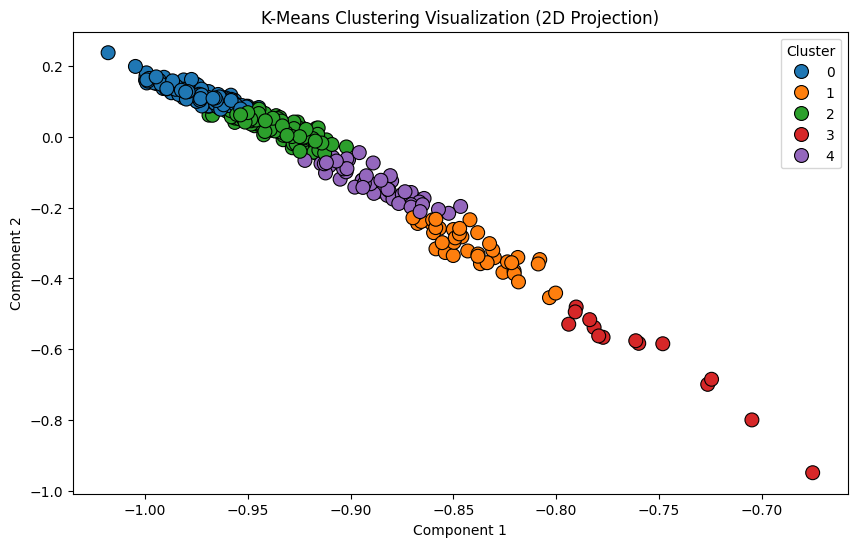

2025-03-09 15:22:14,044 : INFO : collecting all words and their counts
2025-03-09 15:22:14,045 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:22:14,046 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:22:14,050 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:22:14,051 : INFO : Creating a fresh vocabulary
2025-03-09 15:22:14,052 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:22:14.052372', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:22:14,053 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:22:14 

Finished executing at: 2025-03-09 15:22:14 

Executed at: 2025-03-09 15:22:14 



2025-03-09 15:22:14,222 : INFO : EPOCH 11: training on 24723 raw words (4652 effective words) took 0.0s, 516103 effective words/s
2025-03-09 15:22:14,234 : INFO : EPOCH 12: training on 24723 raw words (4622 effective words) took 0.0s, 719075 effective words/s
2025-03-09 15:22:14,245 : INFO : EPOCH 13: training on 24723 raw words (4736 effective words) took 0.0s, 715138 effective words/s
2025-03-09 15:22:14,254 : INFO : EPOCH 14: training on 24723 raw words (4630 effective words) took 0.0s, 1000713 effective words/s
2025-03-09 15:22:14,262 : INFO : EPOCH 15: training on 24723 raw words (4722 effective words) took 0.0s, 1036231 effective words/s
2025-03-09 15:22:14,272 : INFO : EPOCH 16: training on 24723 raw words (4606 effective words) took 0.0s, 899996 effective words/s
2025-03-09 15:22:14,281 : INFO : EPOCH 17: training on 24723 raw words (4788 effective words) took 0.0s, 915505 effective words/s
2025-03-09 15:22:14,292 : INFO : EPOCH 18: training on 24723 raw words (4645 effective w

sg=0, Vector_Size=200, Window=10, Epoch=100
Finished displaying at: 2025-03-09 15:22:15 

Executing 5 start time: 2025-03-09 15:22:15
K=5: Silhouette Score and WSS=0.1747	19.3990

Cluster 0:
- TikTok’s Back in the Game! The Viral App Finally Returns to U.S. App Stores!
- Markelle Fultz back in the NBA: Sacremento Kings sign former No. 1 pick
- William Shatner accuses Mark Hamill of ruining Star Wars
- Naqvi inaugurates passport office at NADRA Mega Centre in Karachi’s Nazimabad
- Ishaq Dar to visit USA for UNSC meeting

Cluster 1:
- Accidents galore as speeding vehicles run amok
- Livestock cards to be delivered on time, says minister
- CM inspects Gulberg integrated uplift pilot project
- Fitness, registration of heavy vehicles: Sindh govt to proactively pursue the objective: Sharjeel
- Justice Mansoor Ali Shah dismisses reference fears, highlights judiciary’s performance

Cluster 2:
- Rs10bn defamation suit: LHC seeks more arguments on IK’s plea
- May 9 crossed all limits, says CB ju

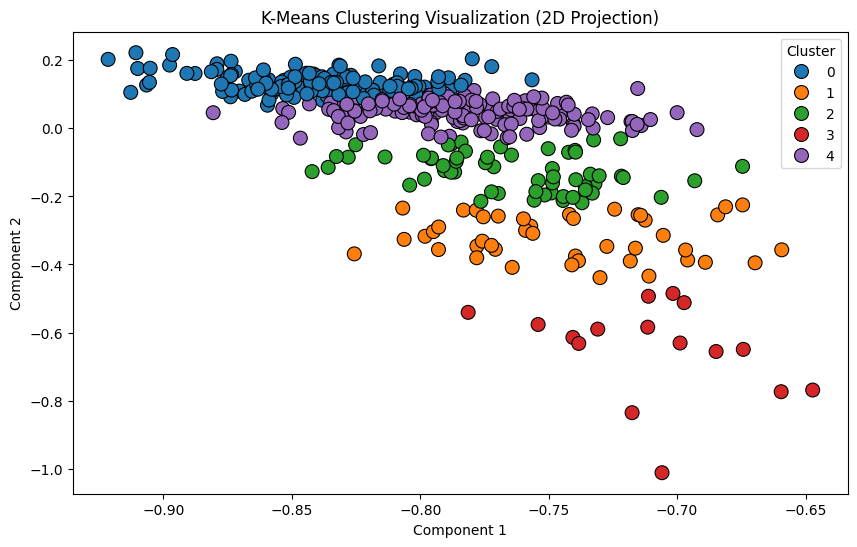

2025-03-09 15:22:15,703 : INFO : collecting all words and their counts
2025-03-09 15:22:15,704 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:22:15,705 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:22:15,709 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:22:15,711 : INFO : Creating a fresh vocabulary
2025-03-09 15:22:15,715 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:22:15.715038', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:22:15,716 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:22:15 

Finished executing at: 2025-03-09 15:22:15 

Executed at: 2025-03-09 15:22:15 



2025-03-09 15:22:15,897 : INFO : EPOCH 9: training on 24723 raw words (4666 effective words) took 0.0s, 401750 effective words/s
2025-03-09 15:22:15,913 : INFO : EPOCH 10: training on 24723 raw words (4760 effective words) took 0.0s, 491238 effective words/s
2025-03-09 15:22:15,927 : INFO : EPOCH 11: training on 24723 raw words (4643 effective words) took 0.0s, 559404 effective words/s
2025-03-09 15:22:15,943 : INFO : EPOCH 12: training on 24723 raw words (4663 effective words) took 0.0s, 481089 effective words/s
2025-03-09 15:22:15,960 : INFO : EPOCH 13: training on 24723 raw words (4657 effective words) took 0.0s, 483739 effective words/s
2025-03-09 15:22:15,975 : INFO : EPOCH 14: training on 24723 raw words (4706 effective words) took 0.0s, 517598 effective words/s
2025-03-09 15:22:15,993 : INFO : EPOCH 15: training on 24723 raw words (4641 effective words) took 0.0s, 429949 effective words/s
2025-03-09 15:22:16,010 : INFO : EPOCH 16: training on 24723 raw words (4652 effective word

sg=0, Vector_Size=200, Window=10, Epoch=150
Finished displaying at: 2025-03-09 15:22:18 

Executing 5 start time: 2025-03-09 15:22:18
K=5: Silhouette Score and WSS=0.1036	28.7533

Cluster 0:
- Law ministry notifies appointments of six SC judges, four high court chief justices
- PM condemns Harnai blast, vows action against culprits
- FO dismisses India-US statement against Pakistan as ‘one-sided, misleading’
- Economic indicators showing positive trends, says Khurram Schehzad
- Two more IMF missions to visit Pakistan for climate resilience funding, EFF review

Cluster 1:
- Elon Musk announces 'Dubai Loop' underground transport system project
- China’s yuan strengthens as central bank pledges to keep exchange rate stable
- Gazans return to ruined homes and severe water shortage
- Yango Pakistan joins hands with Elixs Bikes to introduce affordable EV bikes for partner’s drivers
- Authentic Voices in a Sea of Noise

Cluster 2:
- Pakistan Air Force fighter Jets to kick off ICC Champions Tr

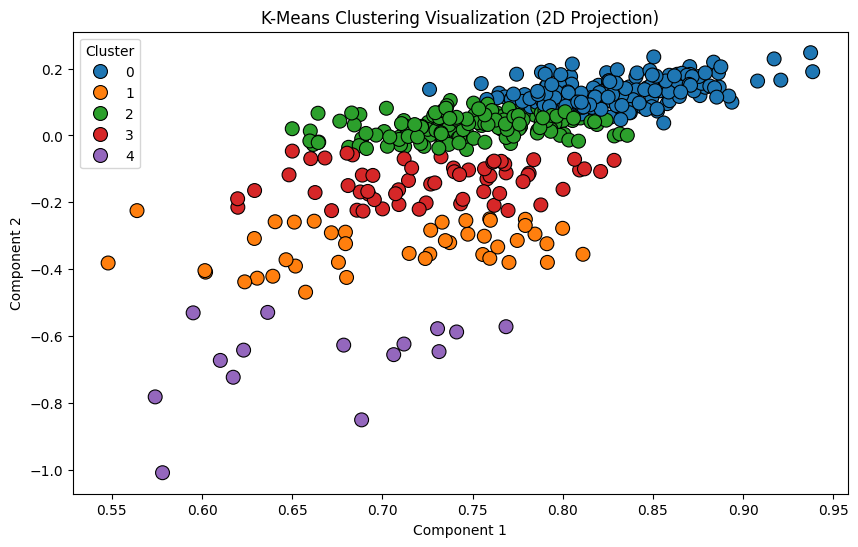

2025-03-09 15:22:18,797 : INFO : collecting all words and their counts
2025-03-09 15:22:18,798 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:22:18,799 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:22:18,802 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:22:18,803 : INFO : Creating a fresh vocabulary
2025-03-09 15:22:18,805 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:22:18.805624', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:22:18,806 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:22:18 

Finished executing at: 2025-03-09 15:22:18 

Executed at: 2025-03-09 15:22:18 



2025-03-09 15:22:18,999 : INFO : EPOCH 10: training on 24723 raw words (4616 effective words) took 0.0s, 475871 effective words/s
2025-03-09 15:22:19,020 : INFO : EPOCH 11: training on 24723 raw words (4669 effective words) took 0.0s, 630077 effective words/s
2025-03-09 15:22:19,048 : INFO : EPOCH 12: training on 24723 raw words (4635 effective words) took 0.0s, 228713 effective words/s
2025-03-09 15:22:19,072 : INFO : EPOCH 13: training on 24723 raw words (4665 effective words) took 0.0s, 351876 effective words/s
2025-03-09 15:22:19,100 : INFO : EPOCH 14: training on 24723 raw words (4754 effective words) took 0.0s, 405753 effective words/s
2025-03-09 15:22:19,131 : INFO : EPOCH 15: training on 24723 raw words (4728 effective words) took 0.0s, 672585 effective words/s
2025-03-09 15:22:19,155 : INFO : EPOCH 16: training on 24723 raw words (4641 effective words) took 0.0s, 327276 effective words/s
2025-03-09 15:22:19,179 : INFO : EPOCH 17: training on 24723 raw words (4761 effective wor

sg=0, Vector_Size=200, Window=10, Epoch=200
Finished displaying at: 2025-03-09 15:22:22 

Executing 5 start time: 2025-03-09 15:22:22
K=5: Silhouette Score and WSS=0.0817	38.7522

Cluster 0:
- Apple selects Alibaba for AI integration in China iPhones
- PM Shehbaz invites Turkish businessmen to invest in Pakistan’s diverse fields
- U.S. deports migrants from Asian countries, including Pakistan, to Panama: NYT
- Karachi sees surge in traffic accidents as govt moves to strengthen road safety
- Shab-e-Barat being observed with religious fervour across country

Cluster 1:
- Govt has no plan to impose new taxes: NA told
- PM vows to advance objective of combating climate change
- Thousands of patients treated at PIMS OPD in evening hours
- Pakistan Software Export Board expands IT infrastructure with 43 technology parks
- Lexi Minetree cast as Elle Woods in ‘Legally Blonde’ prequel on Prime Video

Cluster 2:
- Emirati ambassador to Washington says ‘no alternative’ to Trump's Gaza plan
- UK, 

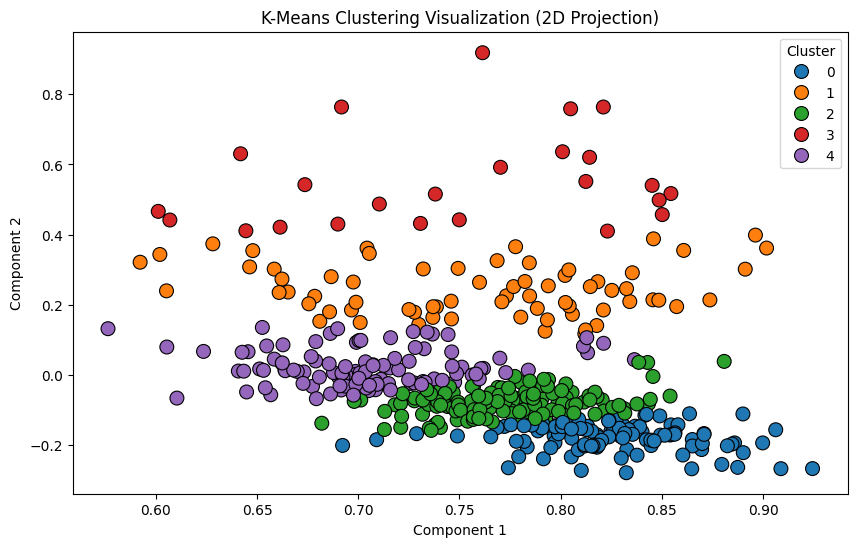

2025-03-09 15:22:22,746 : INFO : collecting all words and their counts
2025-03-09 15:22:22,748 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:22:22,749 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:22:22,756 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:22:22,763 : INFO : Creating a fresh vocabulary
2025-03-09 15:22:22,769 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:22:22.769714', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:22:22,775 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:22:22 

Finished executing at: 2025-03-09 15:22:22 

Executed at: 2025-03-09 15:22:22 



2025-03-09 15:22:22,942 : INFO : EPOCH 1: training on 24723 raw words (4657 effective words) took 0.0s, 257778 effective words/s
2025-03-09 15:22:22,966 : INFO : EPOCH 2: training on 24723 raw words (4687 effective words) took 0.0s, 322854 effective words/s
2025-03-09 15:22:22,993 : INFO : EPOCH 3: training on 24723 raw words (4694 effective words) took 0.0s, 386312 effective words/s
2025-03-09 15:22:23,013 : INFO : EPOCH 4: training on 24723 raw words (4721 effective words) took 0.0s, 364564 effective words/s
2025-03-09 15:22:23,029 : INFO : EPOCH 5: training on 24723 raw words (4651 effective words) took 0.0s, 445507 effective words/s
2025-03-09 15:22:23,059 : INFO : EPOCH 6: training on 24723 raw words (4565 effective words) took 0.0s, 211440 effective words/s
2025-03-09 15:22:23,083 : INFO : EPOCH 7: training on 24723 raw words (4652 effective words) took 0.0s, 552698 effective words/s
2025-03-09 15:22:23,098 : INFO : EPOCH 8: training on 24723 raw words (4733 effective words) took

sg=0, Vector_Size=200, Window=10, Epoch=250
Finished displaying at: 2025-03-09 15:22:27 

Executing 5 start time: 2025-03-09 15:22:27
K=5: Silhouette Score and WSS=0.0779	45.0641

Cluster 0:
- Reforming pension funds in Pakistan: a sustainable approach
- Bureaucrats will also have to declare their assets
- Hamas urges Arab summit, OIC meeting to reject Trump’s plan for Palestinian displacement
- Balochistan CM announces Pink scooties, electric bikes scheme
- Two soldiers hurt in Indian firing at LoC

Cluster 1:
- Volunteers’ climate taskforce to be set up for meaningful environmental action
- CJP Afridi administers oath to newly-appointed SC judges
- Fitness certificate made mandatory for all vehicles
- Sindh minister calls for bold steps to modernise agriculture
- Karachi administration revises timings for movement of heavy vehicles

Cluster 2:
- Babar Azam urges fans to drop 'King' title, highlights team focus
- Babar Azam on verge of breaking multiple records against New Zealand
- M

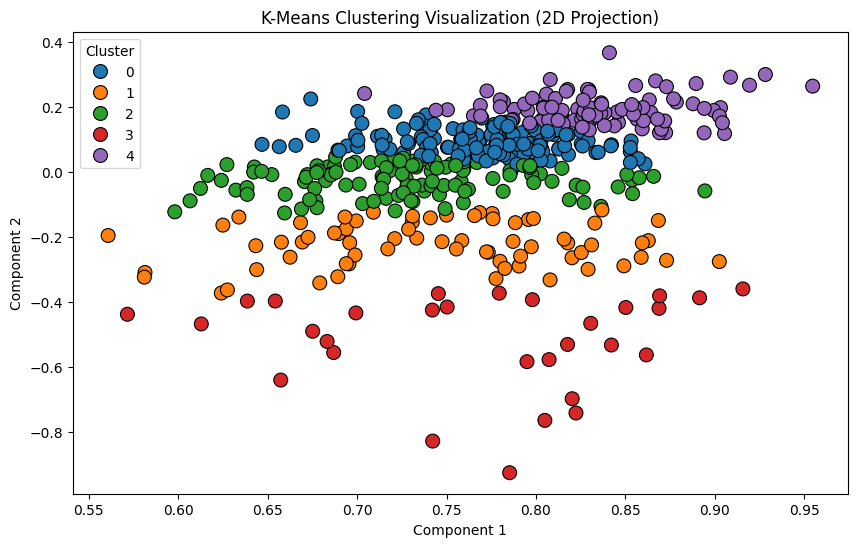

Finished displaying at: 2025-03-09 15:22:28 

Finished executing at: 2025-03-09 15:22:28 



In [353]:
best_combination, best_Sil, best_WSS = run_combinations(5, best_combination, best_Sil, best_WSS)

2025-03-09 15:22:28,560 : INFO : collecting all words and their counts
2025-03-09 15:22:28,561 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:22:28,563 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:22:28,569 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:22:28,571 : INFO : Creating a fresh vocabulary
2025-03-09 15:22:28,574 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:22:28.574152', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:22:28,577 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:22:28 



2025-03-09 15:22:28,746 : INFO : EPOCH 6: training on 24723 raw words (4663 effective words) took 0.0s, 361050 effective words/s
2025-03-09 15:22:28,762 : INFO : EPOCH 7: training on 24723 raw words (4719 effective words) took 0.0s, 903469 effective words/s
2025-03-09 15:22:28,778 : INFO : EPOCH 8: training on 24723 raw words (4656 effective words) took 0.0s, 815569 effective words/s
2025-03-09 15:22:28,797 : INFO : EPOCH 9: training on 24723 raw words (4585 effective words) took 0.0s, 417775 effective words/s
2025-03-09 15:22:28,812 : INFO : EPOCH 10: training on 24723 raw words (4561 effective words) took 0.0s, 524512 effective words/s
2025-03-09 15:22:28,832 : INFO : EPOCH 11: training on 24723 raw words (4668 effective words) took 0.0s, 379657 effective words/s
2025-03-09 15:22:28,847 : INFO : EPOCH 12: training on 24723 raw words (4674 effective words) took 0.0s, 513581 effective words/s
2025-03-09 15:22:28,863 : INFO : EPOCH 13: training on 24723 raw words (4677 effective words) 

sg=0, Vector_Size=200, Window=10, Epoch=50
Finished displaying at: 2025-03-09 15:22:29 

Executing 9 start time: 2025-03-09 15:22:29
K=9: Silhouette Score and WSS=0.1788	4.1686

Cluster 0:
- Pakistan hopes hosting major cricket tournament will erase worries of instability
- Former SC judge Sheikh Azmat Saeed’s funeral to be held today
- US deports migrants from Pakistan to Panama
- Girl found dead, brother rescued after two years of captivity in Chakwal
- Australia thrashed as Sri Lanka sweep ODI series

Cluster 1:
- Page World Economy and Politics News Page 5
- Govt has no plan to impose new taxes: NA told
- 7 Beauty Secrets Celebrities Swear By (And How You Can Steal Them!)
- Kanye West's $250K sex tape scandal resurfaces amid Bianca Censori divorce rumors
- Social media reacts to Paul George scoring only 2 as 76ers fall to Nets

Cluster 2:
- Punjab PA session begins amid highly tense atmosphere: Performance of ‘Specialised Healthcare Dept’ comes under severe criticism
- Term of incu

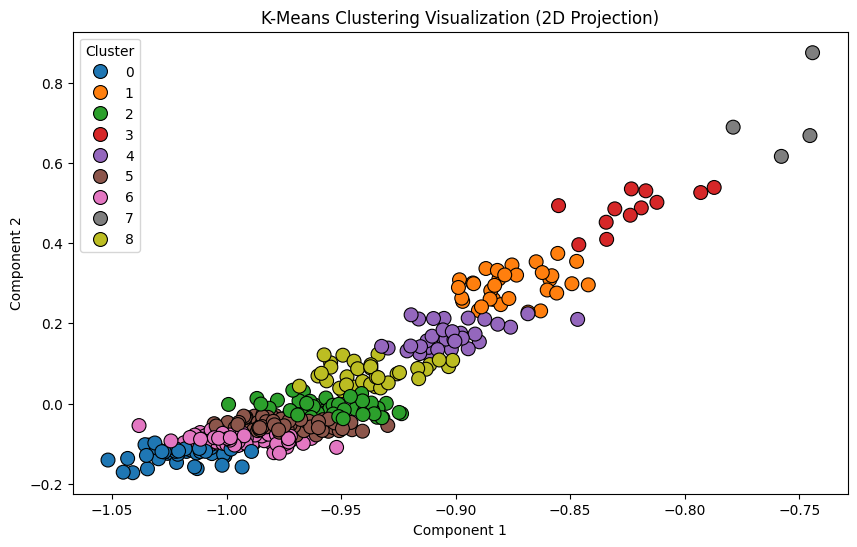

2025-03-09 15:22:29,848 : INFO : collecting all words and their counts
2025-03-09 15:22:29,849 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:22:29,850 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:22:29,855 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:22:29,856 : INFO : Creating a fresh vocabulary
2025-03-09 15:22:29,857 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:22:29.857977', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:22:29,859 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:22:29 

Finished executing at: 2025-03-09 15:22:29 

Executed at: 2025-03-09 15:22:29 



2025-03-09 15:22:30,045 : INFO : EPOCH 9: training on 24723 raw words (4738 effective words) took 0.0s, 531106 effective words/s
2025-03-09 15:22:30,062 : INFO : EPOCH 10: training on 24723 raw words (4677 effective words) took 0.0s, 570651 effective words/s
2025-03-09 15:22:30,077 : INFO : EPOCH 11: training on 24723 raw words (4681 effective words) took 0.0s, 628634 effective words/s
2025-03-09 15:22:30,091 : INFO : EPOCH 12: training on 24723 raw words (4640 effective words) took 0.0s, 588086 effective words/s
2025-03-09 15:22:30,107 : INFO : EPOCH 13: training on 24723 raw words (4762 effective words) took 0.0s, 454168 effective words/s
2025-03-09 15:22:30,125 : INFO : EPOCH 14: training on 24723 raw words (4631 effective words) took 0.0s, 451968 effective words/s
2025-03-09 15:22:30,140 : INFO : EPOCH 15: training on 24723 raw words (4722 effective words) took 0.0s, 501407 effective words/s
2025-03-09 15:22:30,154 : INFO : EPOCH 16: training on 24723 raw words (4727 effective word

sg=0, Vector_Size=200, Window=10, Epoch=100
Finished displaying at: 2025-03-09 15:22:31 

Executing 9 start time: 2025-03-09 15:22:31
K=9: Silhouette Score and WSS=0.1057	16.0477

Cluster 0:
- South African rand firms after Trump’s tariff move; local budget next week
- KU VC Prof Dr Khalid Iraqi inaugurates second agricultural festival
- House Democrats urge Trump to retract comments on Gaza
- SALU, Spanish university sign MoU to boost archaeological studies
- PARTLY FACETIOUS: Our stakeholders know everything about everything

Cluster 1:
- Awareness session on harassment at workplace held
- ‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network
- PM condemns Harnai blast, vows action against culprits
- Imran’s attempts to engage military draw cold shoulder
- Hamas vows to uphold truce, plans to proceed with hostage-prisoner swap

Cluster 2:
- Page World Economy and Politics News ISB Page 5
- Cold and dry weather to prevail across Pakistan: PMD
- Sabrina Carpenter and Dolly Parto

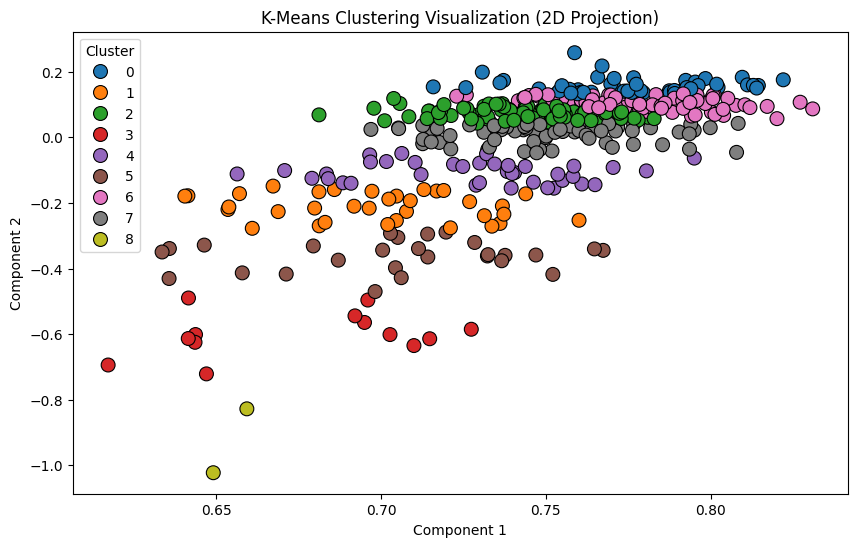

2025-03-09 15:22:32,006 : INFO : collecting all words and their counts
2025-03-09 15:22:32,010 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:22:32,012 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:22:32,019 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:22:32,022 : INFO : Creating a fresh vocabulary
2025-03-09 15:22:32,025 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:22:32.025850', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:22:32,027 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:22:32 

Finished executing at: 2025-03-09 15:22:32 

Executed at: 2025-03-09 15:22:32 



2025-03-09 15:22:32,203 : INFO : EPOCH 5: training on 24723 raw words (4689 effective words) took 0.0s, 344567 effective words/s
2025-03-09 15:22:32,230 : INFO : EPOCH 6: training on 24723 raw words (4625 effective words) took 0.0s, 270932 effective words/s
2025-03-09 15:22:32,247 : INFO : EPOCH 7: training on 24723 raw words (4678 effective words) took 0.0s, 428581 effective words/s
2025-03-09 15:22:32,266 : INFO : EPOCH 8: training on 24723 raw words (4733 effective words) took 0.0s, 522412 effective words/s
2025-03-09 15:22:32,285 : INFO : EPOCH 9: training on 24723 raw words (4585 effective words) took 0.0s, 389685 effective words/s
2025-03-09 15:22:32,308 : INFO : EPOCH 10: training on 24723 raw words (4596 effective words) took 0.0s, 398685 effective words/s
2025-03-09 15:22:32,326 : INFO : EPOCH 11: training on 24723 raw words (4642 effective words) took 0.0s, 463917 effective words/s
2025-03-09 15:22:32,343 : INFO : EPOCH 12: training on 24723 raw words (4712 effective words) t

sg=0, Vector_Size=200, Window=10, Epoch=150
Finished displaying at: 2025-03-09 15:22:34 

Executing 9 start time: 2025-03-09 15:22:34
K=9: Silhouette Score and WSS=0.0936	25.2853

Cluster 0:
- Injuries disrupted England’s training during India ODI series: McCullum
- Three Pakistani players fined for ICC code of conduct breach
- Holding peaceful meetings democratic right of all parties, says Irfan Siddiqui
- Karachi police unveil traffic and parking plan for tri-series, Champions Trophy
- Balochistan CM announces Pink scooties, electric bikes scheme

Cluster 1:
- Resident Alien season 4: new network, plot twists, and release timeline
- ‘England can be dangerous in Champions Trophy despite India loss’, says Butler
- Police arrest three outlaws, recov stolen items
- Justin Bieber’s comment on Keke Palmer’s post raises eyebrows amid Hailey Bieber divorce rumors
- Page World Economy and Politics News Page 5

Cluster 2:
- Pakistan’s 2nd polio case of 2025 reported in Badin
- Israeli military

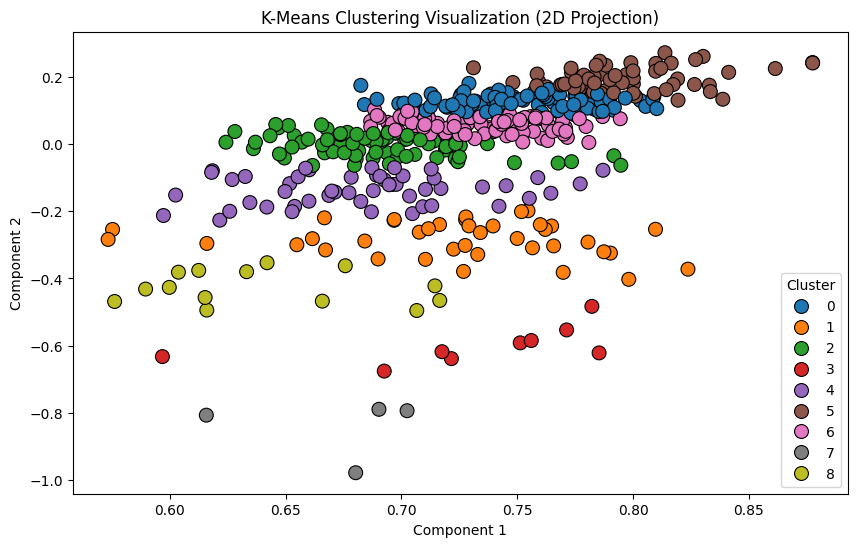

2025-03-09 15:22:35,262 : INFO : collecting all words and their counts
2025-03-09 15:22:35,262 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:22:35,263 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:22:35,269 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:22:35,271 : INFO : Creating a fresh vocabulary
2025-03-09 15:22:35,272 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:22:35.272612', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:22:35,274 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:22:35 

Finished executing at: 2025-03-09 15:22:35 

Executed at: 2025-03-09 15:22:35 



2025-03-09 15:22:35,460 : INFO : EPOCH 3: training on 24723 raw words (4707 effective words) took 0.0s, 171417 effective words/s
2025-03-09 15:22:35,491 : INFO : EPOCH 4: training on 24723 raw words (4640 effective words) took 0.0s, 300801 effective words/s
2025-03-09 15:22:35,530 : INFO : EPOCH 5: training on 24723 raw words (4631 effective words) took 0.0s, 167394 effective words/s
2025-03-09 15:22:35,550 : INFO : EPOCH 6: training on 24723 raw words (4685 effective words) took 0.0s, 445690 effective words/s
2025-03-09 15:22:35,569 : INFO : EPOCH 7: training on 24723 raw words (4731 effective words) took 0.0s, 390295 effective words/s
2025-03-09 15:22:35,585 : INFO : EPOCH 8: training on 24723 raw words (4644 effective words) took 0.0s, 476914 effective words/s
2025-03-09 15:22:35,603 : INFO : EPOCH 9: training on 24723 raw words (4779 effective words) took 0.0s, 504449 effective words/s
2025-03-09 15:22:35,620 : INFO : EPOCH 10: training on 24723 raw words (4698 effective words) too

sg=0, Vector_Size=200, Window=10, Epoch=200
Finished displaying at: 2025-03-09 15:22:39 

Executing 9 start time: 2025-03-09 15:22:39
K=9: Silhouette Score and WSS=0.0685	33.9364

Cluster 0:
- Two soldiers hurt in Indian firing at LoC
- Everyone can’t go to jail to meet Imran: IHC CJ
- The rise of a larger but weaker judiciary?
- Haveli of Maharaja Ranjit Singh being conserved by WCLA
- 'No fear of references if innocent,' says Justice Mansoor Ali Shah

Cluster 1:
- Social media influence makes wedding events expensive
- PM urges Turkish businessmen to invest in diverse fields
- Pakistan expresses strong concerns over US transfer of advanced technology to India
- Local bodies members flexing muscles for another protest in Peshawar
- Arsenal fan Piers Morgan's tweet leaves Liverpool fans seething

Cluster 2:
- Trump says US has approved extradition of suspect in 2008 Mumbai attacks
- UK Pound further climbs up against Pakistani rupee – 14 February 2025
- ICC announces prize money for 20

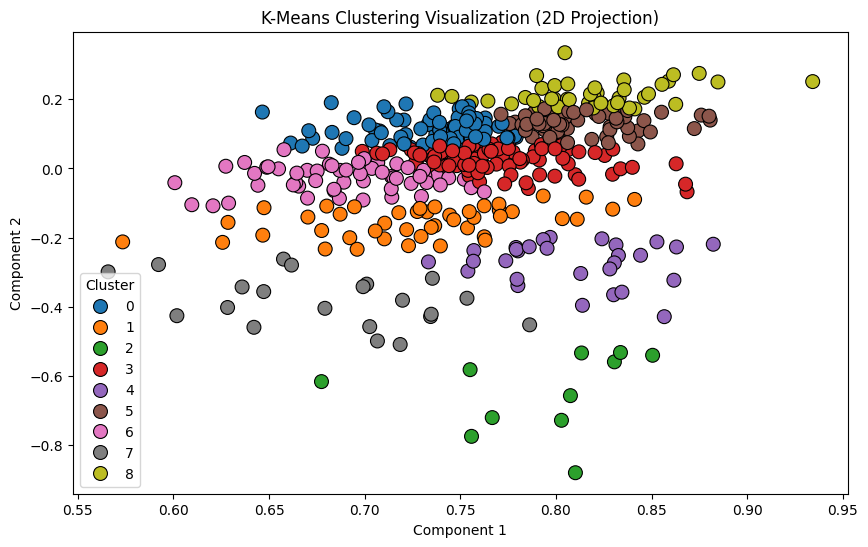

2025-03-09 15:22:39,958 : INFO : collecting all words and their counts
2025-03-09 15:22:39,959 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:22:39,960 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:22:39,966 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:22:39,968 : INFO : Creating a fresh vocabulary
2025-03-09 15:22:39,971 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:22:39.971325', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:22:39,972 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:22:39 

Finished executing at: 2025-03-09 15:22:39 

Executed at: 2025-03-09 15:22:39 



2025-03-09 15:22:40,169 : INFO : EPOCH 4: training on 24723 raw words (4627 effective words) took 0.0s, 309184 effective words/s
2025-03-09 15:22:40,193 : INFO : EPOCH 5: training on 24723 raw words (4625 effective words) took 0.0s, 327010 effective words/s
2025-03-09 15:22:40,217 : INFO : EPOCH 6: training on 24723 raw words (4700 effective words) took 0.0s, 331441 effective words/s
2025-03-09 15:22:40,237 : INFO : EPOCH 7: training on 24723 raw words (4726 effective words) took 0.0s, 381705 effective words/s
2025-03-09 15:22:40,258 : INFO : EPOCH 8: training on 24723 raw words (4648 effective words) took 0.0s, 355137 effective words/s
2025-03-09 15:22:40,283 : INFO : EPOCH 9: training on 24723 raw words (4672 effective words) took 0.0s, 316842 effective words/s
2025-03-09 15:22:40,304 : INFO : EPOCH 10: training on 24723 raw words (4691 effective words) took 0.0s, 362114 effective words/s
2025-03-09 15:22:40,325 : INFO : EPOCH 11: training on 24723 raw words (4683 effective words) to

sg=0, Vector_Size=200, Window=10, Epoch=250
Finished displaying at: 2025-03-09 15:22:46 

Executing 9 start time: 2025-03-09 15:22:46
K=9: Silhouette Score and WSS=0.0787	39.3097

Cluster 0:
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC
- Everyone can’t go to jail to meet Imran: IHC CJ
- AJK interior minister claims India behind smuggling, IED incidents along LoC
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC

Cluster 1:
- Punjab law minister blames ‘complacent’ law officers for court summons to secretaries
- ECC approves transfer of shares of DISCOs in President of Pakistan’s name
- Pakistan set for economic growth after stability: PM
- Karachi police unveil traffic and parking plan for tri-series, Champions Trophy
- Three Pakistani players fined for ICC code of conduct breach

Cluster 2:
- Pakistan CPI 2024 – deep-rooted corruption persists
- Israeli military killed 

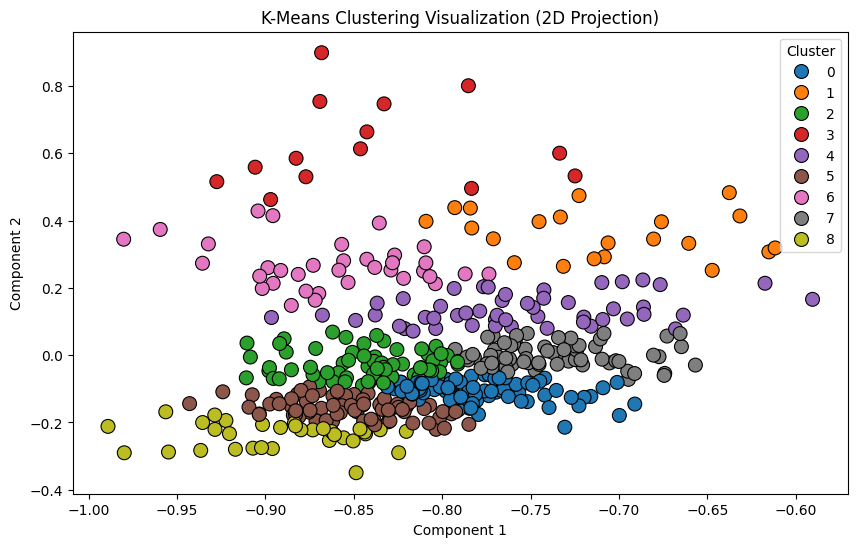

Finished displaying at: 2025-03-09 15:22:47 

Finished executing at: 2025-03-09 15:22:47 



In [354]:
best_combination, best_Sil, best_WSS = run_combinations(9, best_combination, best_Sil, best_WSS)

2025-03-09 15:22:47,324 : INFO : collecting all words and their counts
2025-03-09 15:22:47,327 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:22:47,331 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:22:47,350 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:22:47,357 : INFO : Creating a fresh vocabulary
2025-03-09 15:22:47,366 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:22:47.366167', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:22:47,383 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:22:47 



2025-03-09 15:22:47,457 : INFO : Word2Vec lifecycle event {'msg': 'training model with 4 workers on 38 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10 shrink_windows=True', 'datetime': '2025-03-09T15:22:47.457052', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'train'}
2025-03-09 15:22:47,568 : INFO : EPOCH 0: training on 24723 raw words (4649 effective words) took 0.0s, 104371 effective words/s
2025-03-09 15:22:47,657 : INFO : EPOCH 1: training on 24723 raw words (4657 effective words) took 0.0s, 121981 effective words/s
2025-03-09 15:22:47,726 : INFO : EPOCH 2: training on 24723 raw words (4687 effective words) took 0.0s, 160274 effective words/s
2025-03-09 15:22:47,779 : INFO : EPOCH 3: training on 24723 raw words (4671 effective words) took 0.0s, 136446 effective words/s
2025-03-09 15:22:47,831 : INFO : EPOCH 4: training on 24723 raw wo

sg=0, Vector_Size=200, Window=10, Epoch=50
Finished displaying at: 2025-03-09 15:22:49 

Executing 13 start time: 2025-03-09 15:22:49
K=13: Silhouette Score and WSS=0.1666	2.8682

Cluster 0:
- Senate Dy Chairman, Balochistan CM discuss development projects
- Holding peaceful meetings democratic right of all parties, says Irfan Siddiqui
- Pope Francis taken to hospital for bronchitis after struggling to speak
- Balochistan CM announces Pink scooties, electric bikes scheme
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC

Cluster 1:
- Lahore set to host 9th Faiz Festival 2025 from today
- Stocks remain range-bound, KSE-100 closes 361 points lower
- Second polio case of 2025 reported from Badin
- Israeli military killed 85 journalists in 2024: CPJ
- Gold price soars by Rs2,500 per tola

Cluster 2:
- Passing-out parade of 35th FC course held in Warsak
- Blast at coal mine in Harnai claims 9 lives, leaves 6 injured
- Pakistan set 243-run target for New Zealand in Tri-Nation s

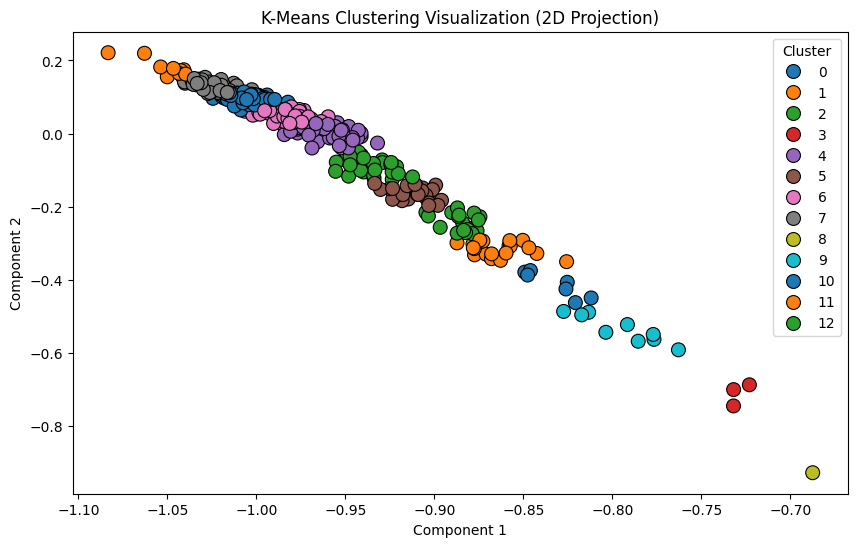

2025-03-09 15:22:50,610 : INFO : collecting all words and their counts
2025-03-09 15:22:50,613 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:22:50,615 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:22:50,627 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:22:50,630 : INFO : Creating a fresh vocabulary
2025-03-09 15:22:50,633 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:22:50.633782', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:22:50,635 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:22:50 

Finished executing at: 2025-03-09 15:22:50 

Executed at: 2025-03-09 15:22:50 



2025-03-09 15:22:50,829 : INFO : EPOCH 4: training on 24723 raw words (4687 effective words) took 0.0s, 245646 effective words/s
2025-03-09 15:22:50,864 : INFO : EPOCH 5: training on 24723 raw words (4695 effective words) took 0.0s, 233928 effective words/s
2025-03-09 15:22:50,896 : INFO : EPOCH 6: training on 24723 raw words (4658 effective words) took 0.0s, 236396 effective words/s
2025-03-09 15:22:50,935 : INFO : EPOCH 7: training on 24723 raw words (4553 effective words) took 0.0s, 214920 effective words/s
2025-03-09 15:22:50,966 : INFO : EPOCH 8: training on 24723 raw words (4625 effective words) took 0.0s, 251894 effective words/s
2025-03-09 15:22:50,997 : INFO : EPOCH 9: training on 24723 raw words (4783 effective words) took 0.0s, 262867 effective words/s
2025-03-09 15:22:51,025 : INFO : EPOCH 10: training on 24723 raw words (4750 effective words) took 0.0s, 267853 effective words/s
2025-03-09 15:22:51,055 : INFO : EPOCH 11: training on 24723 raw words (4702 effective words) to

sg=0, Vector_Size=200, Window=10, Epoch=100
Finished displaying at: 2025-03-09 15:22:54 

Executing 13 start time: 2025-03-09 15:22:54
K=13: Silhouette Score and WSS=0.0943	13.6705

Cluster 0:
- From Napa to Rada: Actor Hani Taha’s journey to the world’s premier drama school
- Naqvi inaugurates passport office at NADRA Mega Centre in Karachi’s Nazimabad
- Illegal structures razed in Lahore’s Subzazar Housing Scheme
- William Shatner accuses Mark Hamill of ruining Star Wars
- Mariyam Nafees’ husband’s past marriage surprises fan

Cluster 1:
- China’s yuan strengthens as central bank pledges to keep exchange rate stable
- Punjab home secretary visits Business Facilitation Centre
- Pakistan, Turkiye sign multiple agreements to strengthen bilateral ties
- Awareness session on harassment at workplace held
- Australia thrashed as Sri Lanka sweep ODI series

Cluster 2:
- Pakistan’s external debt servicing jumps to $4.2 billion in Q2-FY25
- Stocks remain range-bound, KSE-100 closes 361 points 

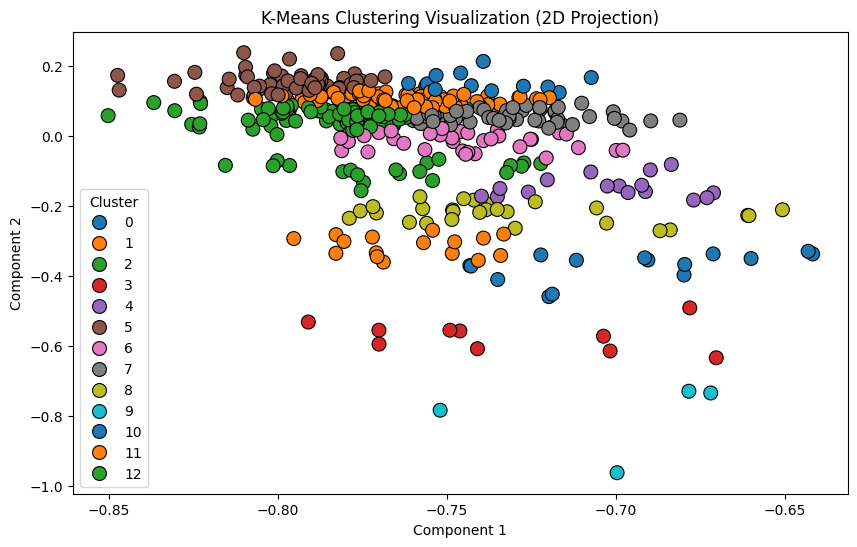

2025-03-09 15:22:55,078 : INFO : collecting all words and their counts
2025-03-09 15:22:55,081 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:22:55,082 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:22:55,094 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:22:55,098 : INFO : Creating a fresh vocabulary
2025-03-09 15:22:55,102 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:22:55.102761', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:22:55,104 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:22:55 

Finished executing at: 2025-03-09 15:22:55 

Executed at: 2025-03-09 15:22:55 



2025-03-09 15:22:55,300 : INFO : EPOCH 3: training on 24723 raw words (4604 effective words) took 0.0s, 122679 effective words/s
2025-03-09 15:22:55,393 : INFO : EPOCH 4: training on 24723 raw words (4739 effective words) took 0.0s, 119069 effective words/s
2025-03-09 15:22:55,472 : INFO : EPOCH 5: training on 24723 raw words (4704 effective words) took 0.0s, 133744 effective words/s
2025-03-09 15:22:55,562 : INFO : EPOCH 6: training on 24723 raw words (4753 effective words) took 0.0s, 149947 effective words/s
2025-03-09 15:22:55,599 : INFO : EPOCH 7: training on 24723 raw words (4712 effective words) took 0.0s, 208777 effective words/s
2025-03-09 15:22:55,656 : INFO : EPOCH 8: training on 24723 raw words (4545 effective words) took 0.0s, 234479 effective words/s
2025-03-09 15:22:55,685 : INFO : EPOCH 9: training on 24723 raw words (4779 effective words) took 0.0s, 269701 effective words/s
2025-03-09 15:22:55,715 : INFO : EPOCH 10: training on 24723 raw words (4640 effective words) too

sg=0, Vector_Size=200, Window=10, Epoch=150
Finished displaying at: 2025-03-09 15:23:00 

Executing 13 start time: 2025-03-09 15:23:00
K=13: Silhouette Score and WSS=0.0852	22.3664

Cluster 0:
- JUI-F chief stands with journalists against PECA law
- ‘Is this the same team?’: Cricket fans rejoice as Pakistan clinches record-breaking victory against South Africa
- 28 injured in car ramming attack in Munich
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice

Cluster 1:
- 7 Beauty Secrets Celebrities Swear By (And How You Can Steal Them!)
- FBR confident of raising tax-to-GDP ratio despite shortfall
- Senate Dy Chairman, Balochistan CM discuss development projects
- Ty Dolla $ign cuts ties with Kanye West, deletes Instagram posts over Antisemitic controversy
- Pakistan hopes hosting major cricket tournament will erase worries of instability

Cluster 2:
- Pakistan’s 2nd polio case of 2025 report

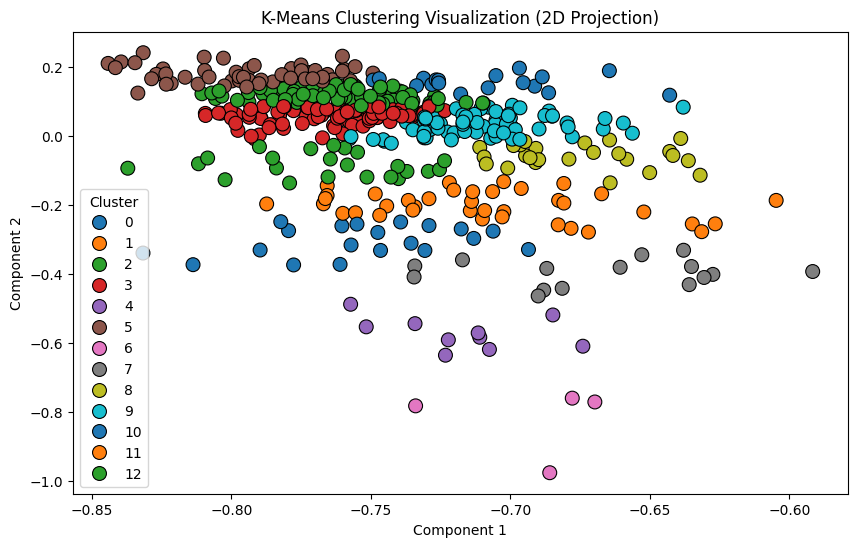

2025-03-09 15:23:01,566 : INFO : collecting all words and their counts
2025-03-09 15:23:01,568 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:23:01,570 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:23:01,579 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:23:01,581 : INFO : Creating a fresh vocabulary
2025-03-09 15:23:01,585 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:23:01.585392', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:23:01,588 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:23:01 

Finished executing at: 2025-03-09 15:23:01 

Executed at: 2025-03-09 15:23:01 



2025-03-09 15:23:01,758 : INFO : EPOCH 4: training on 24723 raw words (4668 effective words) took 0.0s, 295677 effective words/s
2025-03-09 15:23:01,785 : INFO : EPOCH 5: training on 24723 raw words (4685 effective words) took 0.0s, 323802 effective words/s
2025-03-09 15:23:01,817 : INFO : EPOCH 6: training on 24723 raw words (4696 effective words) took 0.0s, 256983 effective words/s
2025-03-09 15:23:01,844 : INFO : EPOCH 7: training on 24723 raw words (4721 effective words) took 0.0s, 270800 effective words/s
2025-03-09 15:23:01,875 : INFO : EPOCH 8: training on 24723 raw words (4758 effective words) took 0.0s, 260414 effective words/s
2025-03-09 15:23:01,904 : INFO : EPOCH 9: training on 24723 raw words (4716 effective words) took 0.0s, 273817 effective words/s
2025-03-09 15:23:01,932 : INFO : EPOCH 10: training on 24723 raw words (4609 effective words) took 0.0s, 279598 effective words/s
2025-03-09 15:23:01,962 : INFO : EPOCH 11: training on 24723 raw words (4656 effective words) to

sg=0, Vector_Size=200, Window=10, Epoch=200
Finished displaying at: 2025-03-09 15:23:07 

Executing 13 start time: 2025-03-09 15:23:07
K=13: Silhouette Score and WSS=0.0705	30.7639

Cluster 0:
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Haveli of Maharaja Ranjit Singh being conserved by WCLA
- Law ministry notifies appointments of six SC judges, four high court chief justices
- Justice Mansoor Ali Shah dismisses reference fears, highlights judiciary’s performance

Cluster 1:
- UEFA Champions League playoffs: Bayern, Benfica in ideal position
- China’s yuan strengthens as central bank pledges to keep exchange rate stable
- DeepSeek dilemma: Why is the Chinese AI app facing global backlash?
- Iran says it will rebuild nuclear facilities if attacked following reports of planned Israeli strike
- Drake addresses rap beef with Joe Budden and Kendrick Lamar on new song 'Gimme a Hug'

Cluster 2:
- Pakistan 

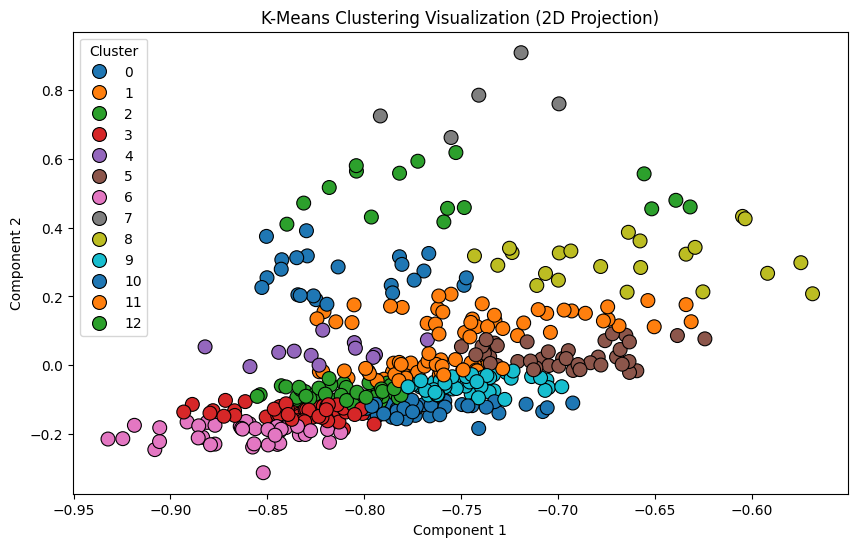

2025-03-09 15:23:08,886 : INFO : collecting all words and their counts
2025-03-09 15:23:08,888 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:23:08,889 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:23:08,901 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:23:08,911 : INFO : Creating a fresh vocabulary
2025-03-09 15:23:08,918 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:23:08.918059', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:23:08,921 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:23:08 

Finished executing at: 2025-03-09 15:23:08 

Executed at: 2025-03-09 15:23:08 



2025-03-09 15:23:09,154 : INFO : EPOCH 1: training on 24723 raw words (4657 effective words) took 0.0s, 113748 effective words/s
2025-03-09 15:23:09,210 : INFO : EPOCH 2: training on 24723 raw words (4680 effective words) took 0.0s, 202970 effective words/s
2025-03-09 15:23:09,256 : INFO : EPOCH 3: training on 24723 raw words (4763 effective words) took 0.0s, 147866 effective words/s
2025-03-09 15:23:09,303 : INFO : EPOCH 4: training on 24723 raw words (4622 effective words) took 0.0s, 226488 effective words/s
2025-03-09 15:23:09,328 : INFO : EPOCH 5: training on 24723 raw words (4645 effective words) took 0.0s, 277208 effective words/s
2025-03-09 15:23:09,357 : INFO : EPOCH 6: training on 24723 raw words (4581 effective words) took 0.0s, 243207 effective words/s
2025-03-09 15:23:09,386 : INFO : EPOCH 7: training on 24723 raw words (4657 effective words) took 0.0s, 278559 effective words/s
2025-03-09 15:23:09,416 : INFO : EPOCH 8: training on 24723 raw words (4686 effective words) took

sg=0, Vector_Size=200, Window=10, Epoch=250
Finished displaying at: 2025-03-09 15:23:17 

Executing 13 start time: 2025-03-09 15:23:17
K=13: Silhouette Score and WSS=0.0668	35.9626

Cluster 0:
- Everyone can’t go to jail to meet Imran: IHC CJ
- Aurangzeb highlights increasing risks facing insurance industry
- 28 injured in car ramming attack in Munich
- Haveli of Maharaja Ranjit Singh being conserved by WCLA
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice

Cluster 1:
- Kanye West returns to X after Antisemitic rant, fans say 'the black vans paid a visit'
- HBL and S&P launch Pakistan’s first Purchasing Managers’ Index
- TikTok’s Back in the Game! The Viral App Finally Returns to U.S. App Stores!
- Europe warns Trump against Ukraine deal ‘behind our backs’
- Despite Political Tensions, Mawra Hocane's 'Sanam Teri Kasam' Re-Release Triumphs Indian Cinema

Cluster 2:
- Local bodies members flexing muscles for another protest in Peshawar
- PPL executes agre

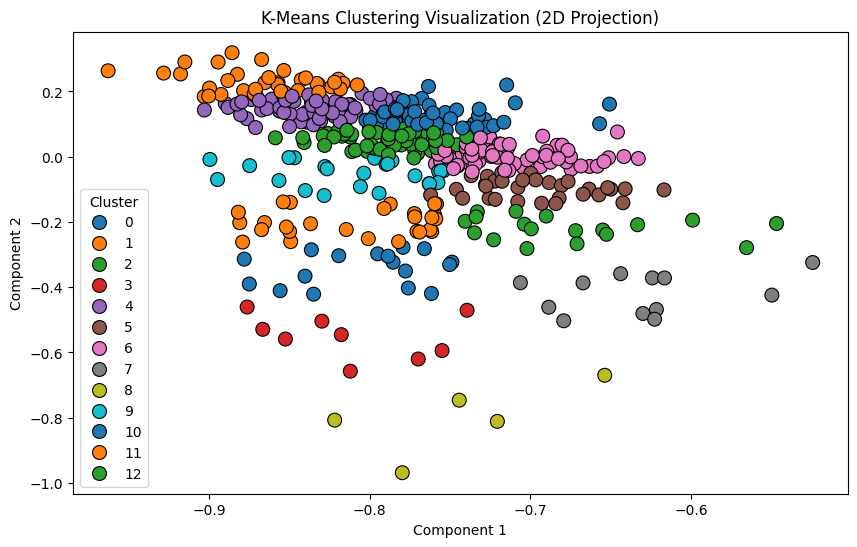

Finished displaying at: 2025-03-09 15:23:19 

Finished executing at: 2025-03-09 15:23:19 



In [355]:
best_combination, best_Sil, best_WSS = run_combinations(13, best_combination, best_Sil, best_WSS)

In [356]:
# Convert to DataFrame for easy export
results_df = pd.DataFrame(results, columns=['k', 'Vectorizer Type', 'vector_size', 'window', 'Epochs Count', 'Vectorizer Name', 'Silhouette Score', 'WSS Score'])

# Save results
results_df.to_csv("clustering_results.csv", index=False)

results_df

,k,Vectorizer Type,vector_size,window,Epochs Count,Vectorizer Name,Silhouette Score,WSS Score
0,5,Word2Vec,200,10,50,CBOW,0.215318,5.157344
1,5,Word2Vec,200,10,100,CBOW,0.174654,19.398977
2,5,Word2Vec,200,10,150,CBOW,0.103582,28.753319
3,5,Word2Vec,200,10,200,CBOW,0.081654,38.752178
4,5,Word2Vec,200,10,250,CBOW,0.077912,45.064060
5,9,Word2Vec,200,10,50,CBOW,0.178766,4.168612
6,9,Word2Vec,200,10,100,CBOW,0.105708,16.047682
7,9,Word2Vec,200,10,150,CBOW,0.093613,25.285263
8,9,Word2Vec,200,10,200,CBOW,0.068521,33.936375
9,9,Word2Vec,200,10,250,CBOW,0.078683,39.309681


In [357]:
# Convert to DataFrame for easy export
wss_scores_df = pd.DataFrame(wss_scores, columns=['k', 'Average WSS Score'])

wss_scores_df

,k,Average WSS Score
0,5,27.425176
1,9,23.749522
2,13,21.126341


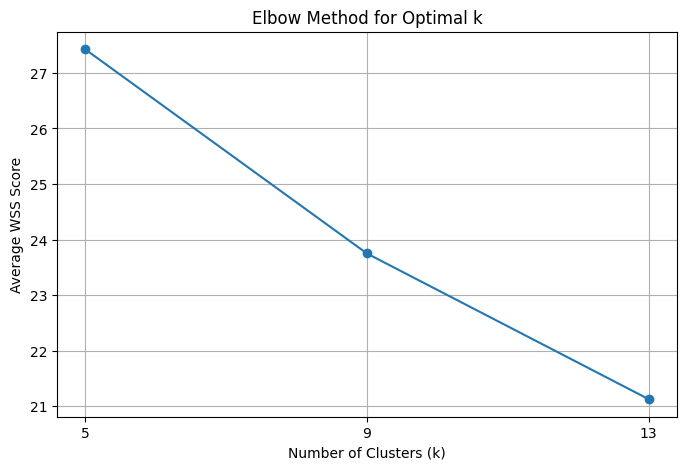

In [358]:
# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(wss_scores_df['k'], wss_scores_df['Average WSS Score'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average WSS Score")
plt.title("Elbow Method for Optimal k")
plt.xticks(wss_scores_df['k'])  # Ensure all k values are shown on x-axis
plt.grid(True)

# Show the plot
plt.show()

In [359]:
best_combination # vector size, window size, epoch

[5, 200, 10, 50, 0.21531789, 5.157343864440918]